## Goal: Create a model to predict whether or not a customer will Churn.
---

## The data

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [36]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [39]:
for col in df.columns:
    print(col,len(df[col].unique()),df[col].unique())

customerID 7032 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender 2 ['Female' 'Male']
SeniorCitizen 2 [0 1]
Partner 2 ['Yes' 'No']
Dependents 2 ['No' 'Yes']
tenure 72 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService 2 ['No' 'Yes']
MultipleLines 3 ['No phone service' 'No' 'Yes']
InternetService 3 ['DSL' 'Fiber optic' 'No']
OnlineSecurity 3 ['No' 'Yes' 'No internet service']
OnlineBackup 3 ['Yes' 'No' 'No internet service']
DeviceProtection 3 ['No' 'Yes' 'No internet service']
TechSupport 3 ['No' 'Yes' 'No internet service']
StreamingTV 3 ['No' 'Yes' 'No internet service']
StreamingMovies 3 ['No' 'Yes' 'No internet service']
Contract 3 ['Month-to-month' 'One year' 'Two year']
PaperlessBilling 2 ['Yes' 'No']
PaymentMethod 4 ['Electronic check' 'Mailed check' 'Bank tr

## Exploratory Data Analysis

In [40]:
#As customerID is unique, drop it
df = df.drop('customerID',axis=1)

In [41]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

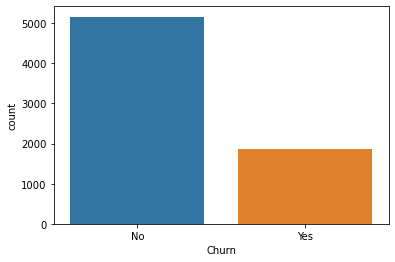

In [42]:
sns.countplot(x='Churn',data=df)

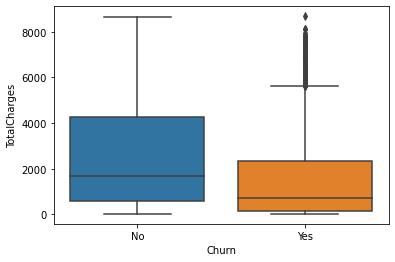

In [43]:
sns.boxplot(x='Churn',y='TotalCharges',data=df);

**Interesting that on average, the customers that churned paid lesser total charges.**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

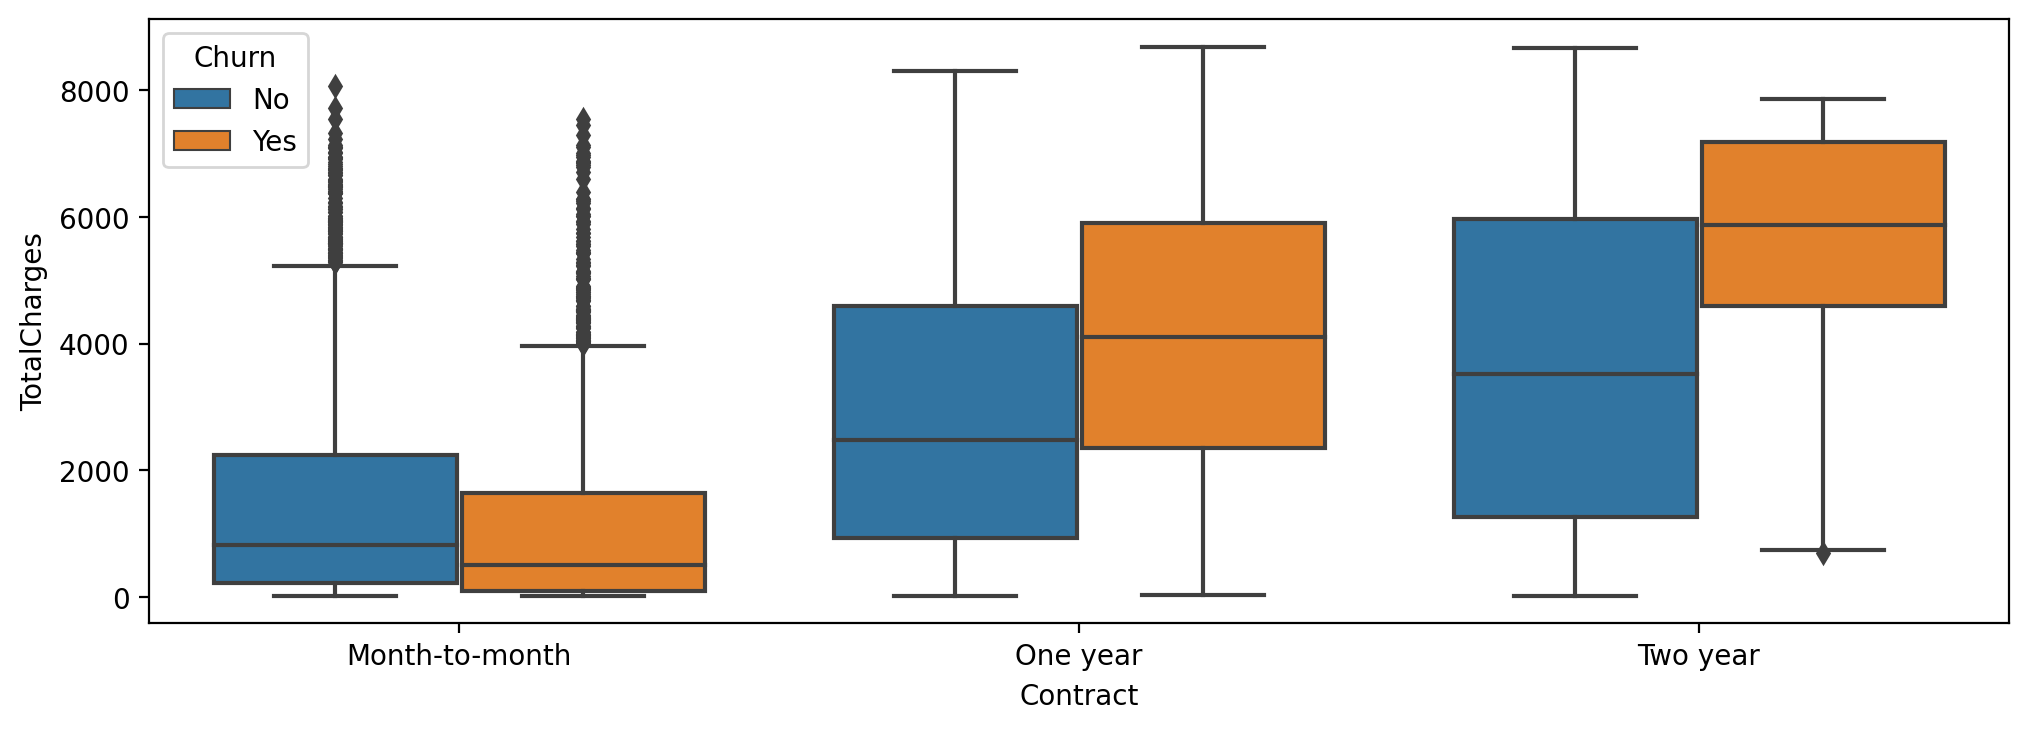

In [44]:
plt.figure(figsize=(12,4),dpi=200)
sns.boxplot(x='Contract',y='TotalCharges',hue='Churn',data=df)

For customers with One or Two year contract that churned, the average TotalCharges were higher.

In [55]:
#`SeniorCitizen` is a categorical column
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [57]:
#Add in SeniorCitizen
corr_df = pd.get_dummies(df.select_dtypes(include='object'))

In [60]:
corr_df.corr()['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
SeniorCitizen_0                           -0.150541
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMetho

In [68]:
Churn_Yes_corr = corr_df.corr()['Churn_Yes'].sort_values().iloc[1:-1]

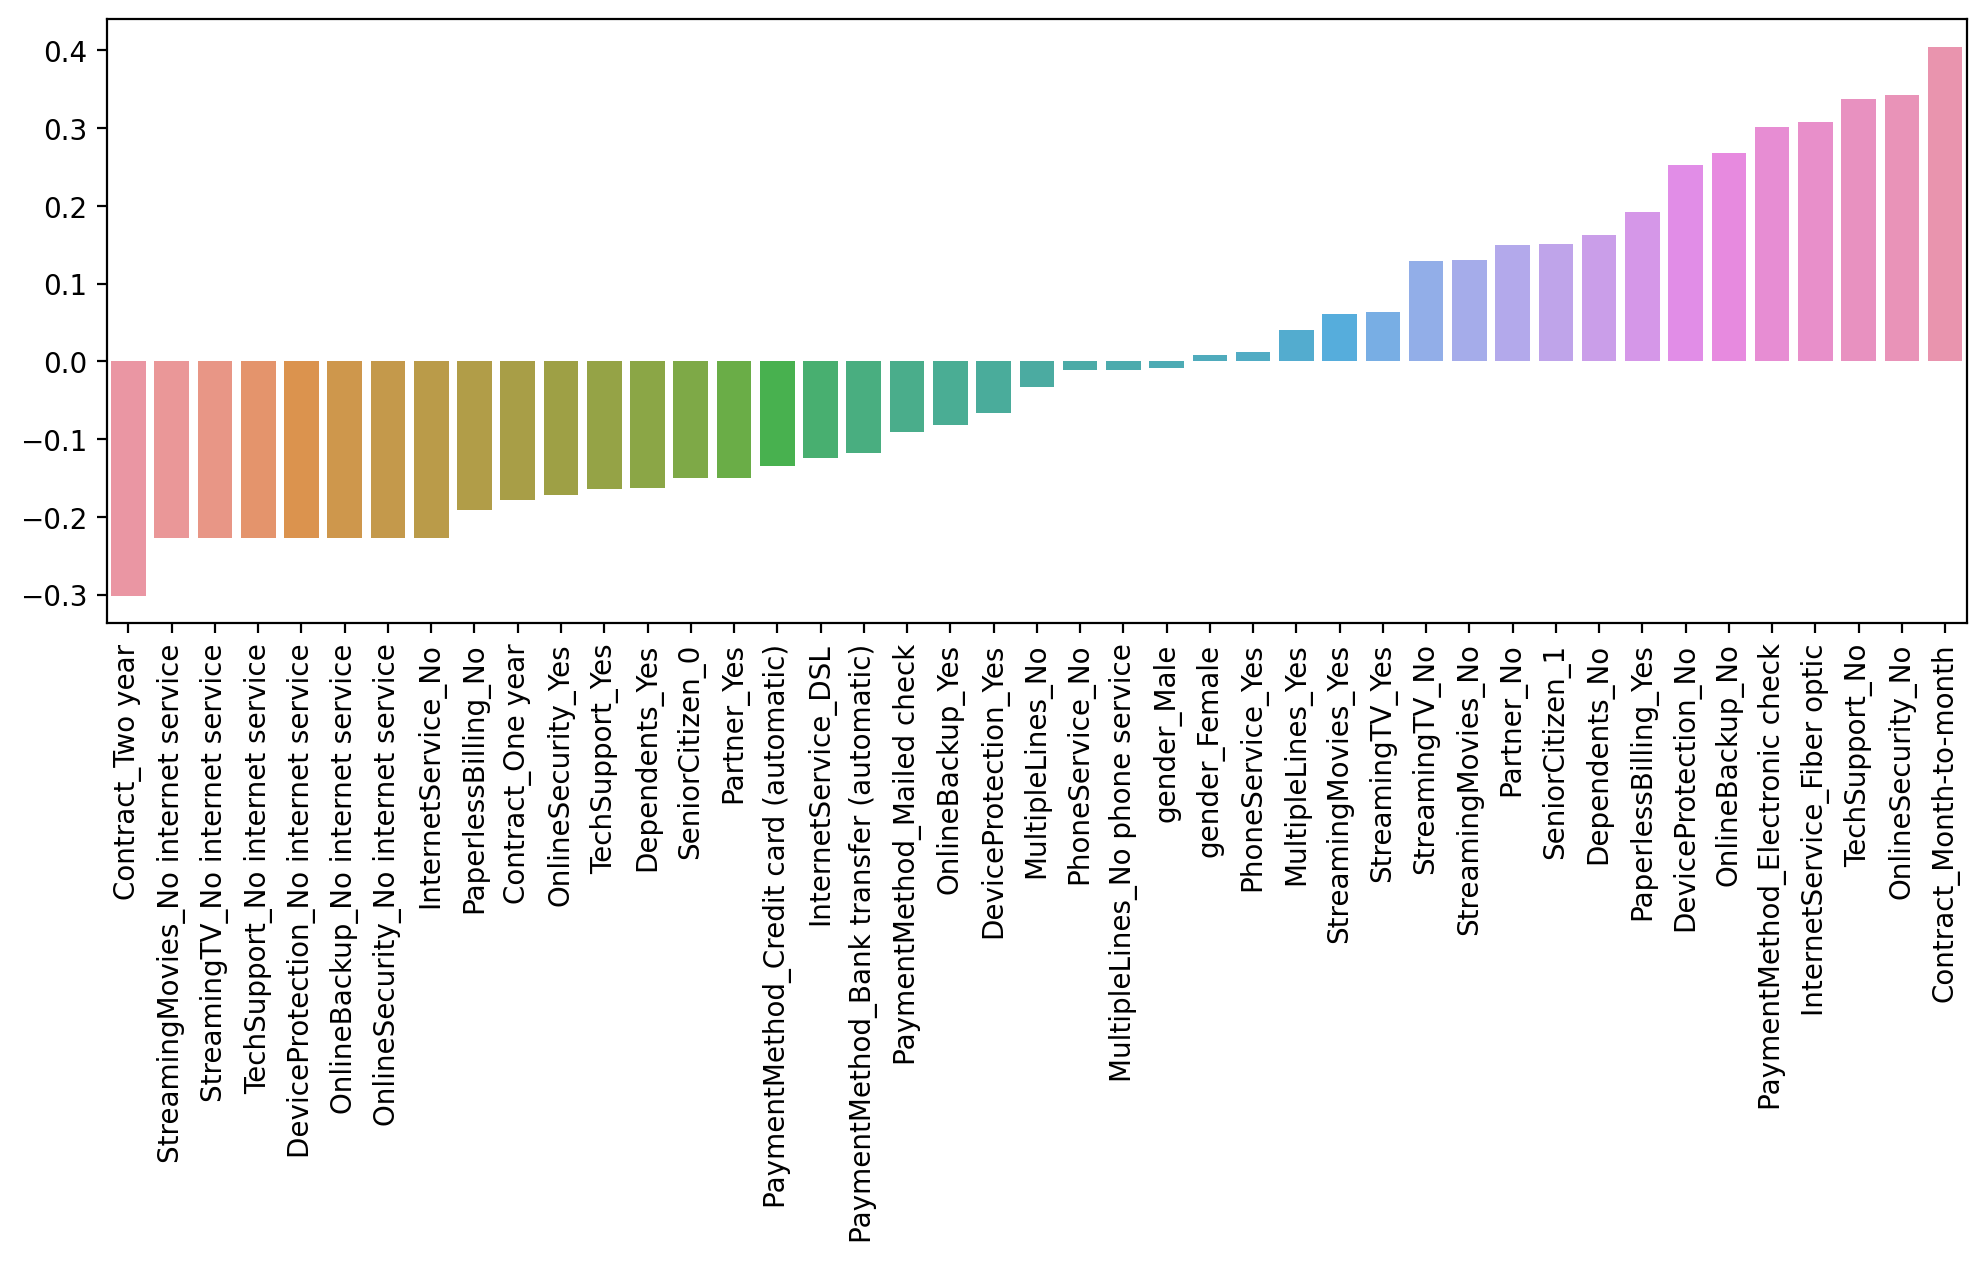

In [69]:
plt.figure(figsize=(12,4),dpi=200)
sns.barplot(x=Churn_Yes_corr.index,y=Churn_Yes_corr.values)
plt.xticks(rotation=90);

In [70]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

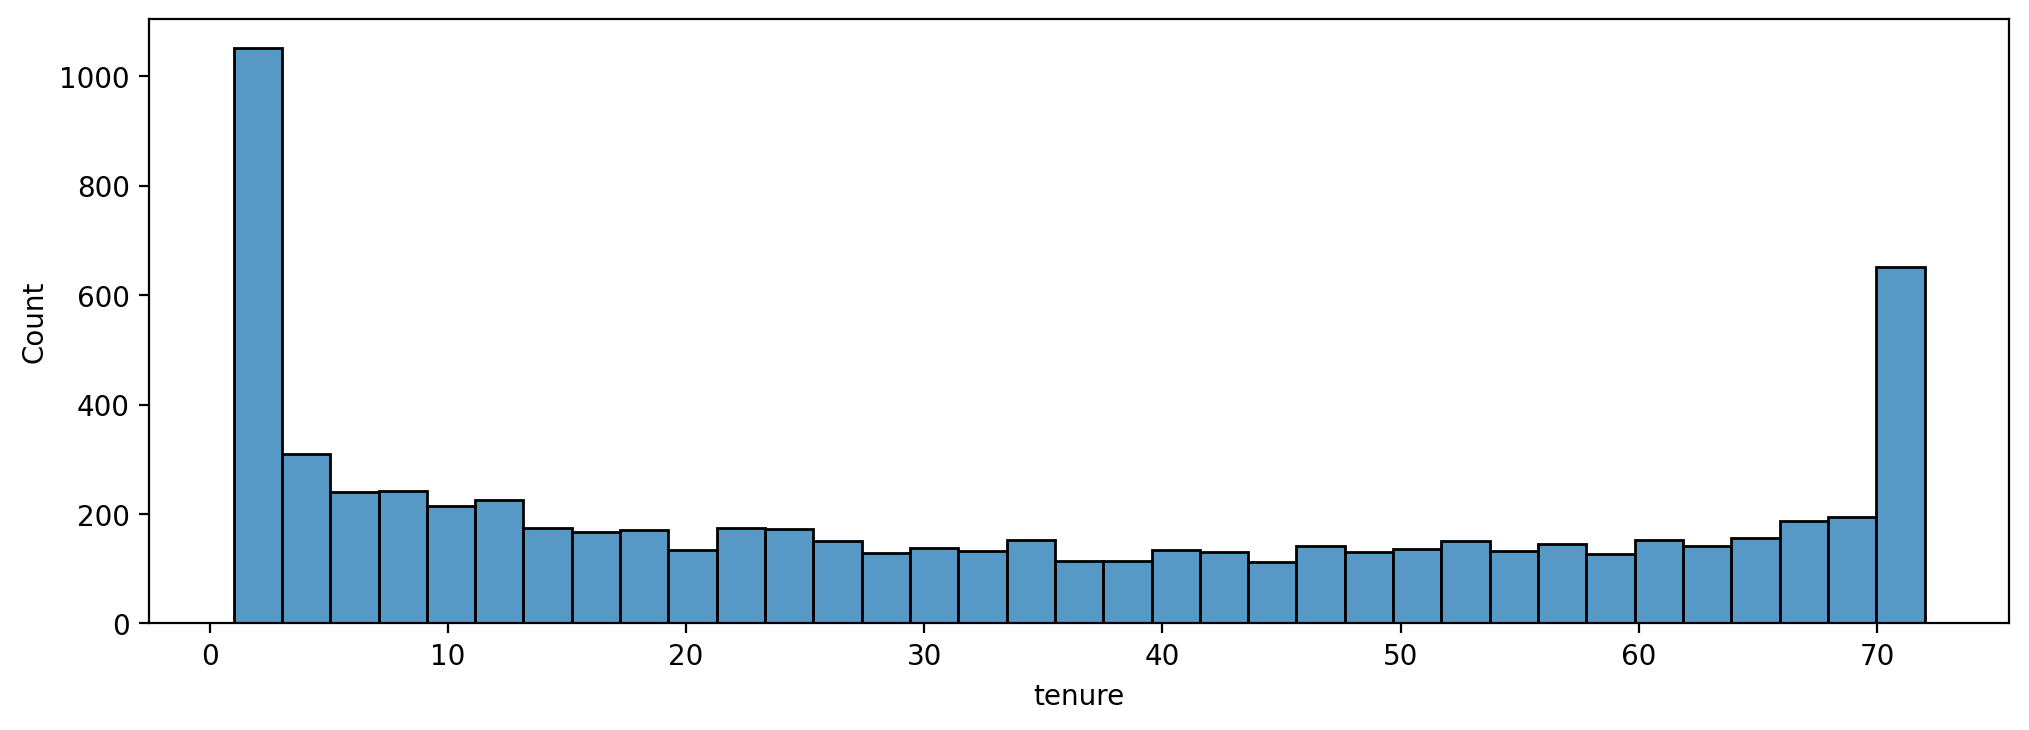

In [71]:
plt.figure(figsize=(12,4),dpi=200)
sns.histplot(x='tenure',data=df,bins=35);

<Figure size 2000x600 with 0 Axes>

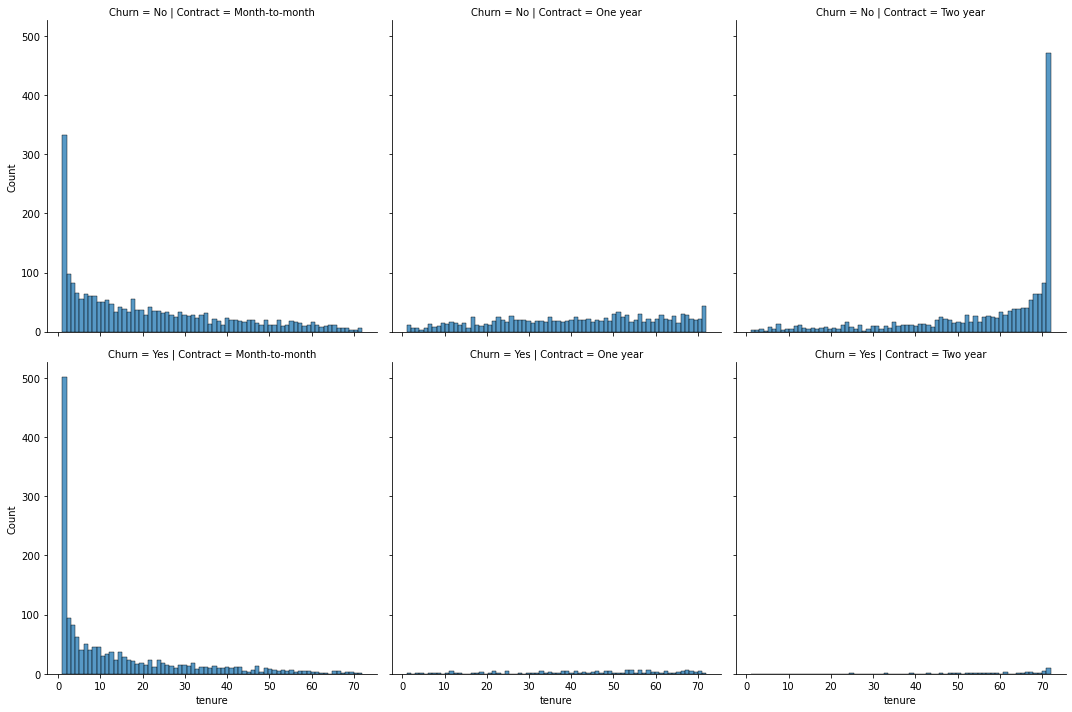

In [72]:
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

**Those with 1 or 2 years contracts rarely churns. On the other hand, those with month to month contracts are likely to churn.**

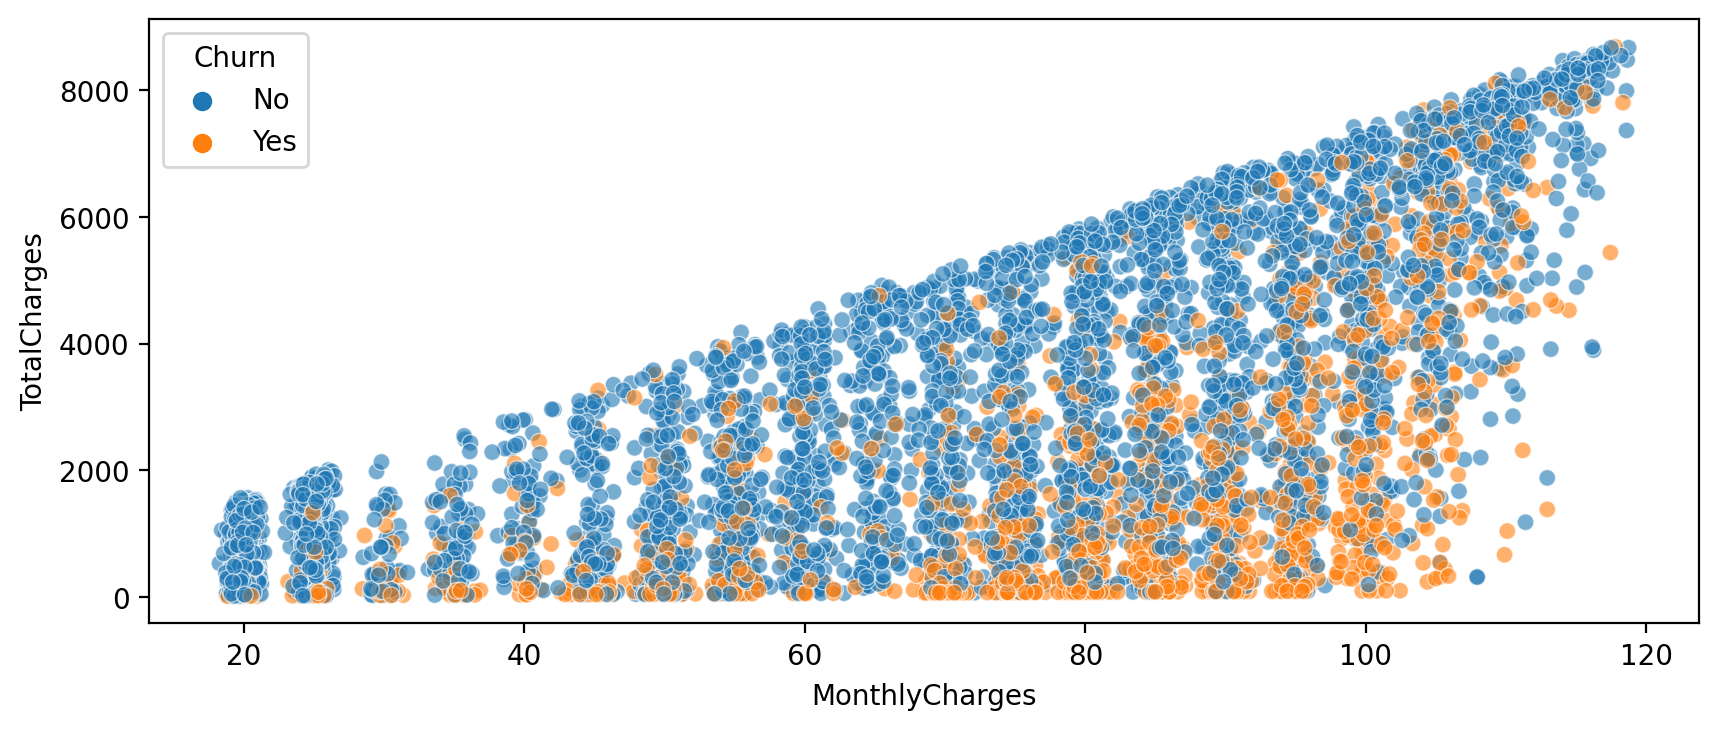

In [73]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df,alpha=0.6);

#### Creating Cohorts based on Tenure

In [74]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [77]:
df.groupby(by='tenure')['Churn'].count()

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: Churn, Length: 72, dtype: int64

In [75]:
df.groupby(['Churn','tenure']).count().transpose()['No']

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
DeviceProtection,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [78]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No'].loc['gender'] #Choose any column
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes'].loc['gender']
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [79]:
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: gender, Length: 72, dtype: float64

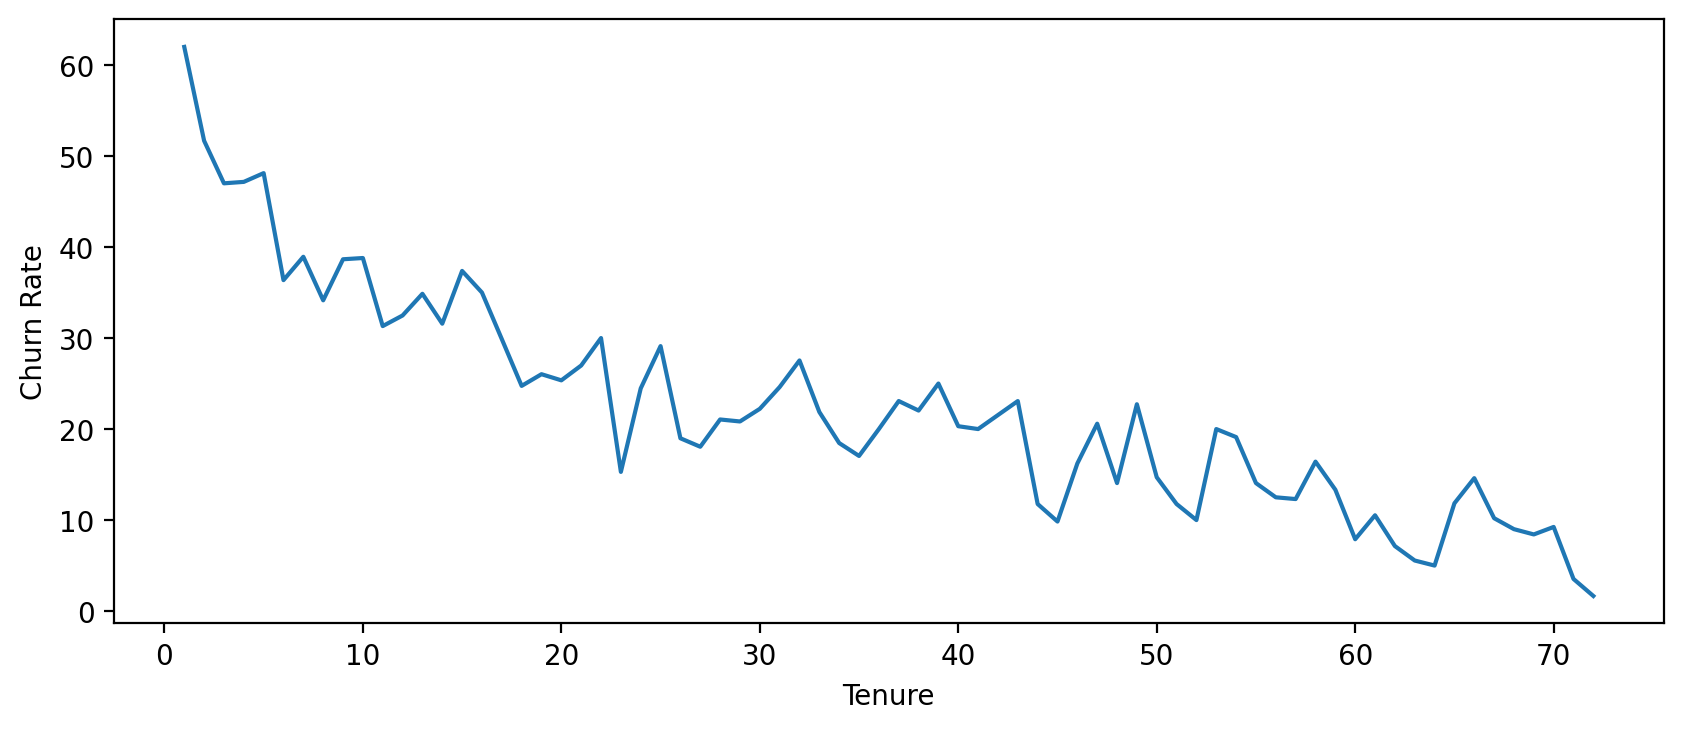

In [80]:
plt.figure(figsize=(10,4),dpi=200)
plt.plot(churn_rate.index,churn_rate.values)
plt.xlabel("Tenure")
plt.ylabel("Churn Rate");

### Create Broader Cohort Groups
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [84]:
def tenure_cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [85]:
df['Tenure Cohort'] = df['tenure'].apply(tenure_cohort)

In [86]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


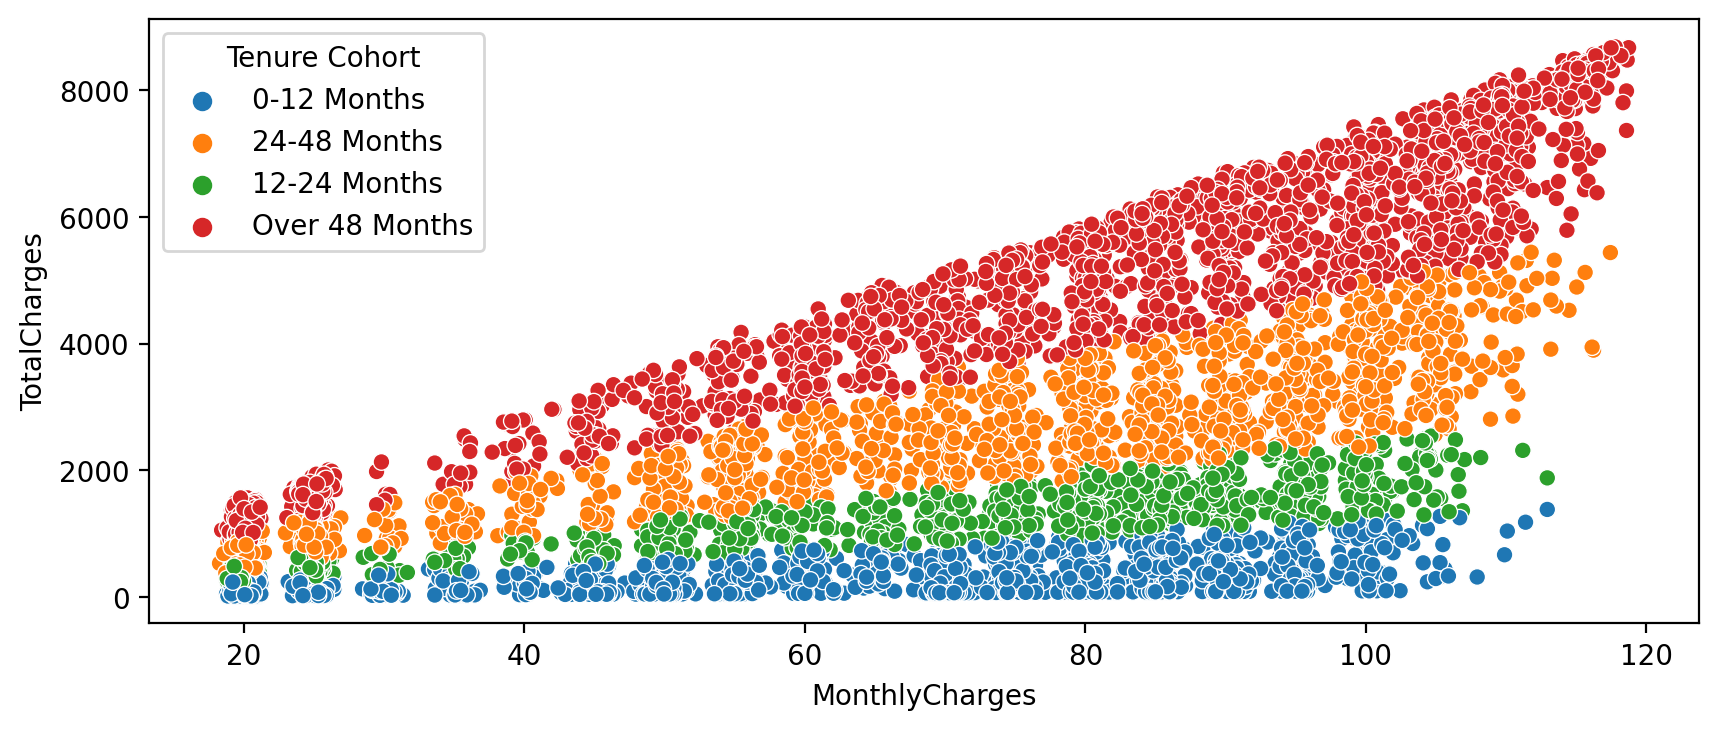

In [87]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',data=df);

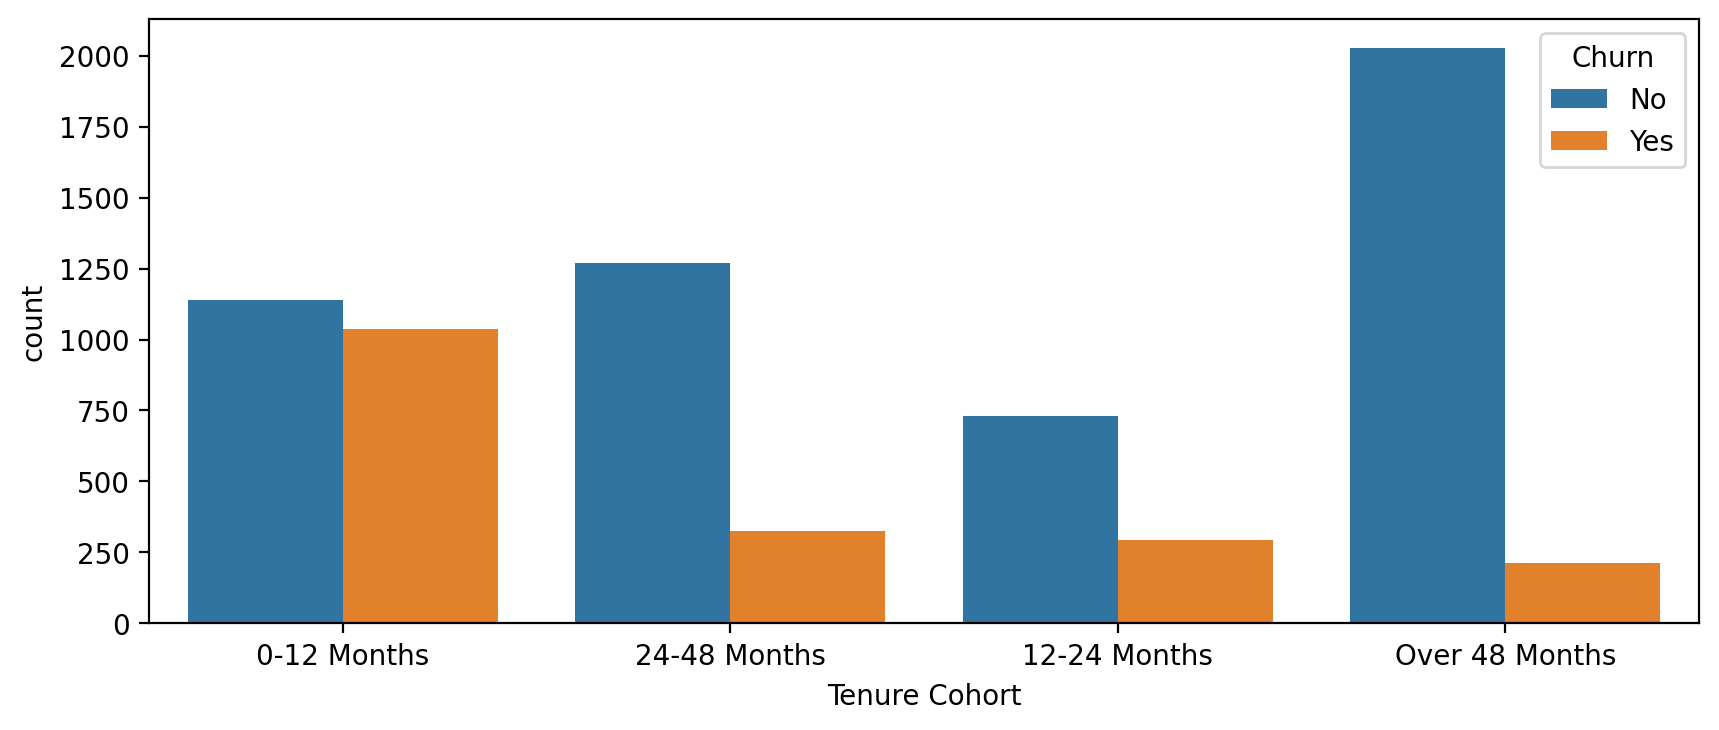

In [88]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Tenure Cohort',hue='Churn',data=df);

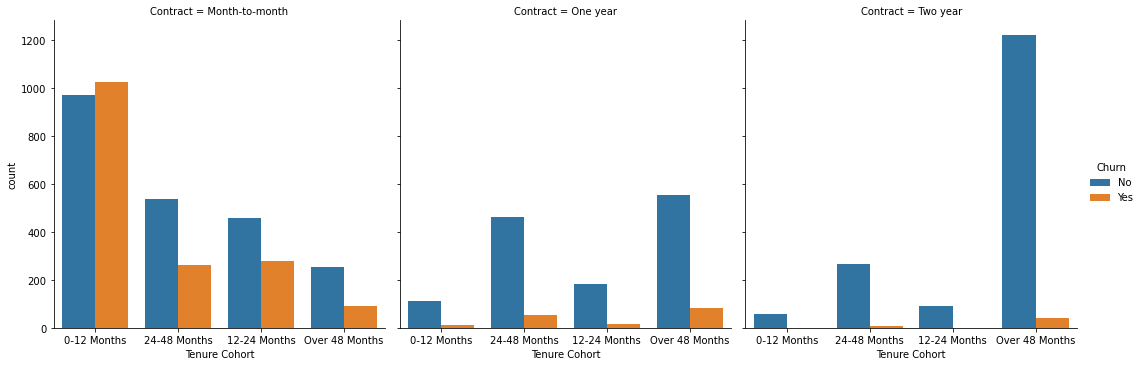

In [89]:
sns.catplot(x='Tenure Cohort',hue='Churn',col='Contract',kind='count',data=df);

**The churn rate is very high for those with short tenure duration(0-12 months) and on Month-to-month contract.**

### Recommendations
1. Lower prices for month to month contracts to hopefully convince customers to stay and then convert them to 1/2 year contracts. 
2. For 1/2 year contract customers with high monthly charges, perhaps send a thank you letter and slightly lower down their charges as they might churn as shown above
3. Offer/Promote 1/2 year contracts to new customers instead of month to month


## Modelling

In [91]:
X = df.drop('Churn',axis=1)
X = pd.get_dummies(X)
y = df['Churn']

In [125]:
X.dtypes

tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
SeniorCitizen_0                              uint8
SeniorCitizen_1                              uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Lets start off with a Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,plot_confusion_matrix

In [98]:
tree = DecisionTreeClassifier(max_depth=6)

In [99]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [100]:
tree_preds = tree.predict(X_test)

In [101]:
print(classification_report(y_test,tree_preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.54      0.50      0.52       147

    accuracy                           0.81       704
   macro avg       0.70      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



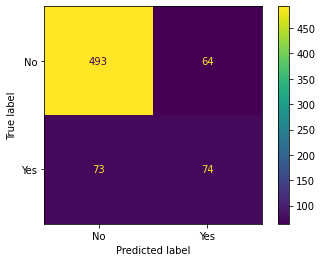

In [102]:
plot_confusion_matrix(tree,X_test,y_test);

In [103]:
tree.feature_importances_

array([0.16321452, 0.04285714, 0.05708315, 0.        , 0.        ,
       0.        , 0.01148708, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00541526, 0.00829208,
       0.        , 0.        , 0.143717  , 0.        , 0.005525  ,
       0.        , 0.00449955, 0.00511634, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02761192, 0.        ,
       0.00185493, 0.        , 0.        , 0.00289365, 0.00384813,
       0.        , 0.00120261, 0.48437035, 0.        , 0.00330123,
       0.0025846 , 0.00418245, 0.        , 0.00114775, 0.01979526,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [104]:
feat_impt = pd.Series(data=tree.feature_importances_,index=X.columns).sort_values()

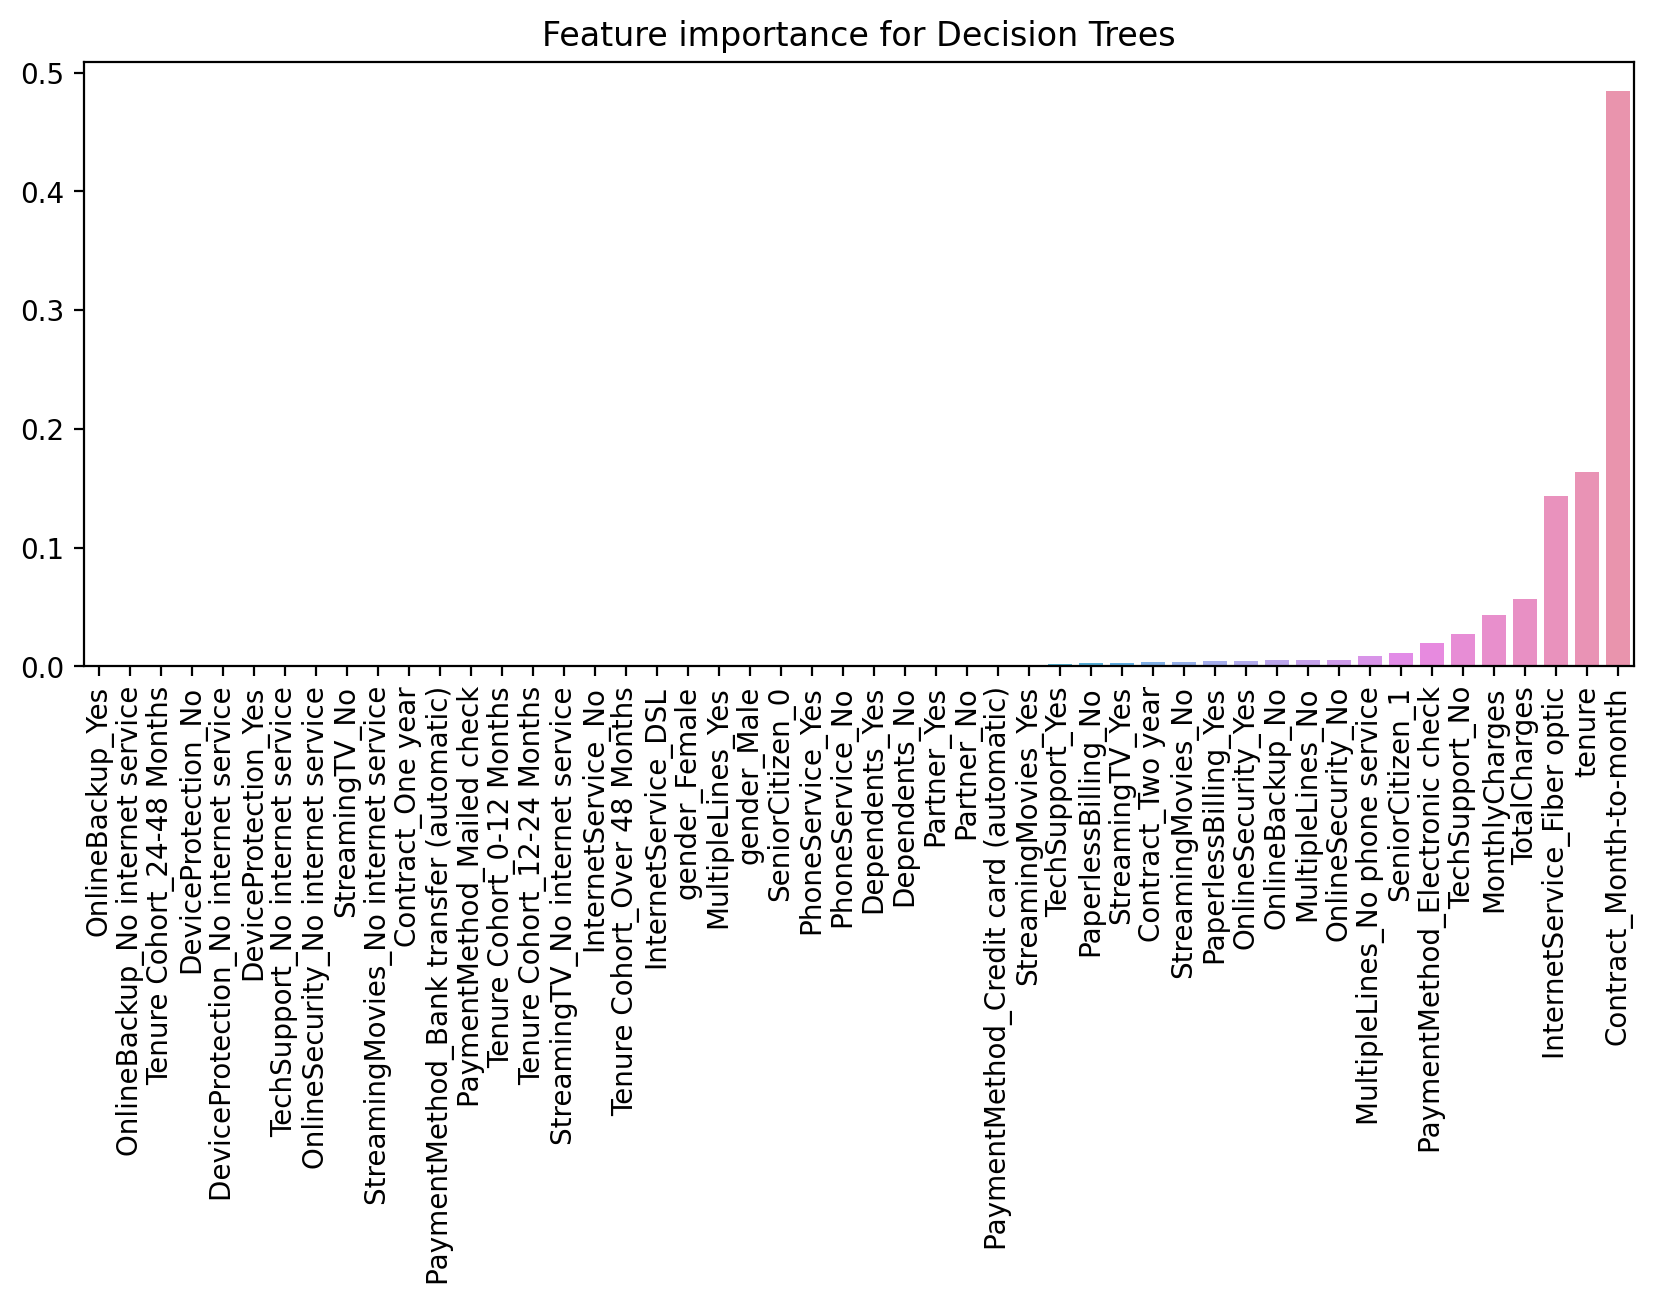

In [107]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=feat_impt.index,y=feat_impt.values)
plt.title('Feature importance for Decision Trees')
plt.xticks(rotation=90);

### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier()

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
rfc_preds = rfc.predict(X_test)

In [113]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.46      0.48       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



In [114]:
rfc.feature_importances_

array([0.11932748, 0.13372059, 0.14238088, 0.01674856, 0.01756951,
       0.01218246, 0.01331416, 0.01389965, 0.01436041, 0.01198734,
       0.01222006, 0.00300258, 0.0029991 , 0.01244328, 0.00308716,
       0.0119869 , 0.01034126, 0.03158462, 0.00256221, 0.02892709,
       0.00247096, 0.00996519, 0.01761296, 0.00372807, 0.0120142 ,
       0.01494714, 0.00131253, 0.01115946, 0.02597249, 0.00173964,
       0.01025394, 0.01122958, 0.00296693, 0.01072807, 0.01109058,
       0.00094993, 0.01115876, 0.05310143, 0.00897637, 0.01791545,
       0.01468046, 0.01466286, 0.01194038, 0.0125331 , 0.0281634 ,
       0.01079412, 0.02510814, 0.00737548, 0.00770865, 0.01309443])

### Boosted Trees

In [115]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [116]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
ada_preds = ada_model.predict(X_test)

In [117]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



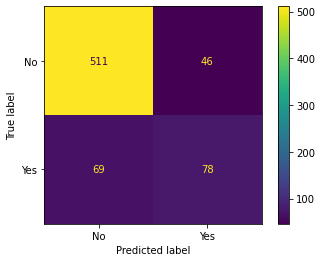

In [118]:
plot_confusion_matrix(ada_model,X_test,y_test);

In [119]:
#Gradient Boosting
gradient_model = GradientBoostingClassifier()
gradient_model.fit(X_train,y_train)
gradient_preds = gradient_model.predict(X_test)

In [120]:
print(classification_report(y_test,gradient_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.58      0.51      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.71       704
weighted avg       0.81      0.82      0.82       704



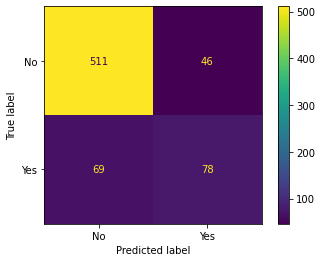

In [121]:
plot_confusion_matrix(ada_model,X_test,y_test);

With base models, we got best performance from an AdaBoostClassifier, but note, I didn't do any gridsearching and most models performed about the same on the data set.
As the data is quite limited, having more data would probably be more beneficial for the models.